In [1]:
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt

## Part 1 ‑ Exploratory data analysis

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins['count'] = 1
logins.set_index('login_time',inplace=True)
logins = logins.resample('15T').agg({'count':'sum'})

In [4]:
logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


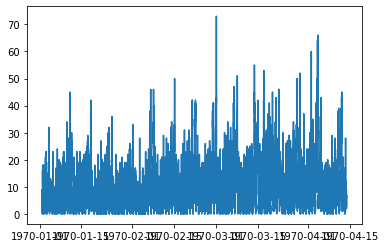

In [5]:
plt.plot(logins)

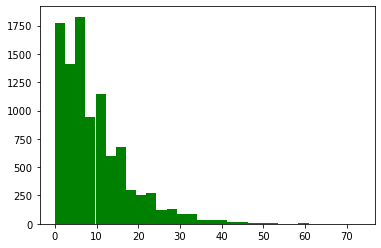

In [6]:
plt.hist(logins,bins=30,color='green');

In [7]:
logins_sep = logins.reset_index()
logins_sep['date'] = [d.date() for d in logins_sep['login_time']]
logins_sep['time'] = [d.time() for d in logins_sep['login_time']]
logins_sep.drop('login_time',axis=1,inplace=True)
logins_sep.set_index('time',inplace=True)
logins_sep.head()

,count,date
time,,
20:00:00,2,1970-01-01
20:15:00,6,1970-01-01
20:30:00,9,1970-01-01
20:45:00,7,1970-01-01
21:00:00,1,1970-01-01


In [8]:
logins_sep = logins_sep.groupby(logins_sep.index)['count'].sum()

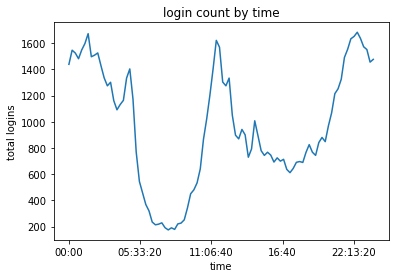

In [9]:
logins_sep.plot()
plt.title('login count by time')
plt.ylabel('total logins')
plt.show()

## Part 2 ‑ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

### 1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

For each driver, calculate the difference between income from one city to another divided by total income

so: ABS(avg_driver_income(city1) - avg_driver_income(city2))/total_driver_income.
Which will measure as (1) when the driver is exclusive to 1 city, and <1 when driver is receive income from both city with a lower bound of 0 

Metrics is chosen because it describes the behavior of the driver, and it is stationary across all drivers regardless of their income. Which can then be used as a benchmark to distinguish whether or not drivers are becoming not city-exclusive.


### 2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:


### a. how you will implement the experiment
### b. what statistical test(s) you will conduct to verify the significance of the observation
### c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


every month, a different, small group of drivers will be given a toll-free reimbursement, and over a period of time, we will see if there is a difference in the metrics above between the small group to the rest of the drivers

a hypothesis test, analyzing whether the mean of the metrics above between the two groups over time are different.

after some observations are made over a period of time, the hypothesis can determine whether or not the mean is actually different at a certain level of confidence.

## Part 3 ‑ Predictive modeling

In [41]:
df = pd.read_json('ultimate_data_challenge.json')
df = df.fillna(df.mean())

In [42]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [43]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [44]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  object        
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  object        
dtypes: bool(1), datetime64[ns](2), float64(4), int

Filled in nan values with mean, and create a new column to check whether a user is active or not based on the days inactive taken from the last trip date of the table. Because last trip date is 

In [66]:
today = df['last_trip_date'].max()
df['days_active'] = df['last_trip_date']-df['signup_date']
df['days_inactive'] = (today-df['last_trip_date']) 
df['active'] = df['days_inactive'] <1 date.timedelta(30)

In [67]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_active,days_inactive,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,14 days,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,57 days,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,175 days,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2 days,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,108 days,False


In [72]:
df = pd.get_dummies(df)

In [76]:
x = df.drop(['signup_date','last_trip_date','days_active','days_inactive','active'],axis=1)
y = df.active

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [88]:
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns, index=x.index)

In [90]:
from sklearn.linear_model import LogisticRegression

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [95]:
lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.7219333333333333

In [97]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [98]:
lr.predict_proba(x_test)

array([[0.46267093, 0.53732907],
       [0.64644504, 0.35355496],
       [0.72870353, 0.27129647],
       ...,
       [0.3467692 , 0.6532308 ],
       [0.38609496, 0.61390504],
       [0.5193368 , 0.4806632 ]])

Revalidate model with cross validation

In [100]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5,random_state=42).fit(x_train,y_train)

In [101]:
clf.score(x_test,y_test)

0.7212666666666666